In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


import warnings
warnings.filterwarnings('ignore')

matplotlib.style.use('ggplot')

# %matplotlib notebook

## Generate some test-data

In [2]:
from cmfsapy.data import gen_ncube

In [3]:
n = 2500
d = 5
w = np.arange(0.01, 30, 0.01)  # axis for analytical pdf

X = gen_ncube(n, d)

## Measure dimensions

In [4]:
# set neighborhood size
k1 = 5 

### Farahmand-Szepesvari-Audibert estimator

In [5]:
from cmfsapy.dimension.fsa import fsa
from cmfsapy.theoretical import theoretical_fsa_pdf

We apply periodic boundary conditions to exclude edge effects:

In [20]:
dims_fsa = fsa(X, k1, boxsize=1)[0]
pdf = theoretical_fsa_pdf(w, k1, d)

(0.0, 30.0)

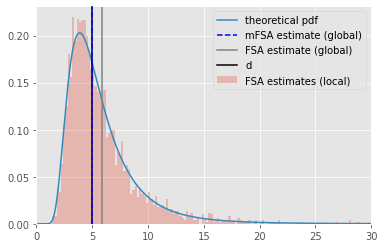

In [21]:
bins = np.arange(0, 100, 0.2)

fig1, ax1 = plt.subplots(1,1)

_ = ax1.hist(dims_fsa[:, -1], density=True, bins=bins, alpha=0.3, label='FSA estimates (local)')
plt.plot(w, pdf, label='theoretical pdf')

ax1.axvline(np.nanmedian(dims_fsa[:, -1]), color='b', label='mFSA estimate (global)', zorder=101, ls='--')
ax1.axvline(np.nanmean(dims_fsa[:, -1]), color='grey', label='FSA estimate (global)')
ax1.axvline(d, color='k', label='d')


ax1.legend()

ax1.set_xlim(0, 30)

Se these results when edge effects are turned on:

In [22]:
dims_fsa_edge = fsa(X, k1, boxsize=None)[0]

(0.0, 15.0)

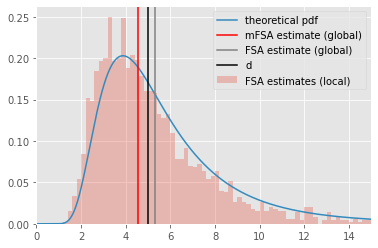

In [23]:
bins = np.arange(0, 100, 0.2)

fig1, ax1 = plt.subplots(1,1)

_ = ax1.hist(dims_fsa_edge[:, -1], density=True, bins=bins, alpha=0.3, label='FSA estimates (local)')
ax1.plot(w, pdf, label='theoretical pdf')

ax1.axvline(np.nanmedian(dims_fsa_edge[:, -1]), color='r', label='mFSA estimate (global)')
ax1.axvline(np.nanmean(dims_fsa_edge[:, -1]), color='grey', label='FSA estimate (global)')

ax1.axvline(d, color='k', label='d')


ax1.legend()

ax1.set_xlim(0, 15)

### cmFSA estimator

In [24]:
from cmfsapy.dimension.cmfsa import calibrate, cmfsa

In [27]:
coefs = calibrate(n, k1, np.arange(1,10), N_realiz=15)

100%|██████████| 9/9 [00:01<00:00,  8.98it/s]


In [28]:
d_cmfsa = cmfsa(X, k1, powers=[-1, 1, 2, 3], alphas=coefs)[-1]

(0.0, 15.0)

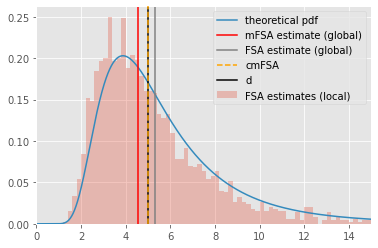

In [29]:
fig2, ax2 = plt.subplots(1,1)

_ = ax2.hist(dims_fsa_edge[:, -1], density=True, bins=bins, alpha=0.3, label='FSA estimates (local)')
ax2.plot(w, pdf, label='theoretical pdf')


ax2.axvline(np.nanmedian(dims_fsa_edge[:, -1]), color='r', label='mFSA estimate (global)')
ax2.axvline(np.nanmean(dims_fsa_edge[:, -1]), color='grey', label='FSA estimate (global)')
_ = plt.axvline(d_cmfsa, color='orange', linestyle='--', zorder=101, label='cmFSA')
_ = plt.axvline(d, color='k', label='d')


plt.legend()
ax2.set_xlim(0, 15)

### Maximum Likelihood estimator

In [30]:
from cmfsapy.dimension.fsa import ml_dims
from scipy.stats import hmean

In [31]:
d_ml = ml_dims(X, k2=k1)[0]

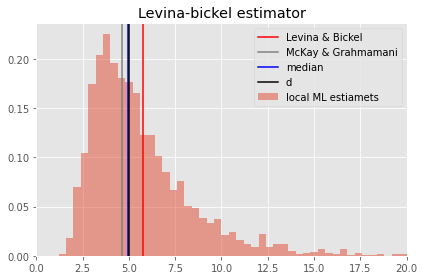

In [32]:
plt.figure()

plt.hist(d_ml, bins=2*bins, density=True, alpha=0.5, label='local ML estiamets')
plt.axvline(d_ml.mean(), color='r', label='Levina & Bickel')
plt.axvline(1 / np.mean(1/d_ml), color='grey', label='McKay & Grahmamani')
plt.axvline(np.nanmedian(d_ml), color='blue', label='median')


plt.axvline(d, color='k', label='d')

plt.legend()
plt.title('Levina-bickel estimator')
plt.xlim(0, 20)
plt.tight_layout()